# NumPy基礎-陣列和向量化計算

## ndarray:多維陣列物件

### ndarray 多維度陣列物件，是Python中快速又有彈性的容器。陣列這種東西，能用類似的語法，對整團資料的每個常數元素做一樣的數學運算。

#### 產生一個隨機資料小陣列:

In [2]:
import numpy as np
#產生一些隨機資料
data=np.random.randn(2,3)

In [3]:
data

array([[ 0.05845393, -0.47798011, -2.55009208],
       [ 0.86408676, -1.52222731,  1.01587531]])

#### 對data做數學運算:

In [4]:
data*10 #每個值都乘上10

array([[  0.58453932,  -4.77980107, -25.50092085],
       [  8.64086764, -15.22227308,  10.15875308]])

In [5]:
data+data #每個對應的 cell 相加

array([[ 0.11690786, -0.95596021, -5.10018417],
       [ 1.72817353, -3.04445462,  2.03175062]])

### ndarray是一種通用的同質資料的多維容器，所有的元素型態必須一致。
### 每一個陣列都有一個shape以及一個dtype。
### shape是標明維度的tuple。
### dtype是描述陣列中的資料型態。

In [6]:
data.shape

(2, 3)

In [7]:
data.dtype

dtype('float64')

## 建立 ndarray

### 建立陣列最簡單的方法，就是使用array函式，可接受任何序列物件作為參數(包括其他陣列)，並產生一個包含傳入資料的新NumPy陣列。

In [8]:
# 將 list 傳入陣列
data1=[1,2,3,4]

In [9]:
ar1=np.array(data1)

In [10]:
ar1

array([1, 2, 3, 4])

In [12]:
# 巢式 list 。
# 兩個等長的 list ，會被轉為多為陣列:
data2=[[1,2,3,4],[5,6,7,8]]
ar2=np.array(data2)

In [13]:
ar2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

### 由於data2是list的list，所以ar2是二維並有對應shape的NumPy陣列。

In [15]:
# 用 ndim 檢查維度
ar2.ndim

2

In [16]:
# 用 shape 來檢查
ar2.shape

(2, 4)

### 除非明確指定，否則np,array會試圖為自己建立的陣列找一個適當的型態，該型態會被儲存在dtype的metadata物件中。

In [17]:
ar1.dtype

dtype('int32')

In [18]:
ar2.dtype

dtype('int32')

### zeros和ones可建立內容全部為0或1的指定長度陣列。
### empty用來建立陣列，不用設定初始值。
### 若想用以上方法建立高維度陣列的話，就將維度放在一個tuple中傳進去。

In [19]:
# 長度為 10 皆為 0 的陣列
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# 多維度陣列 -> 3個長度為6的皆為0的二維度陣列
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [21]:
# 三維度陣列
np.empty((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

#### 不能假設np.empty建立的陣列內容必定都是0，某些情況下，它的內容可能是未初始化的 "垃圾" 值。

### 類似於range函式，arange是陣列值版本:

In [22]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

#### NumPy著重在數值計算，若未指定資料型態的話，通常會是float64(浮點數)。

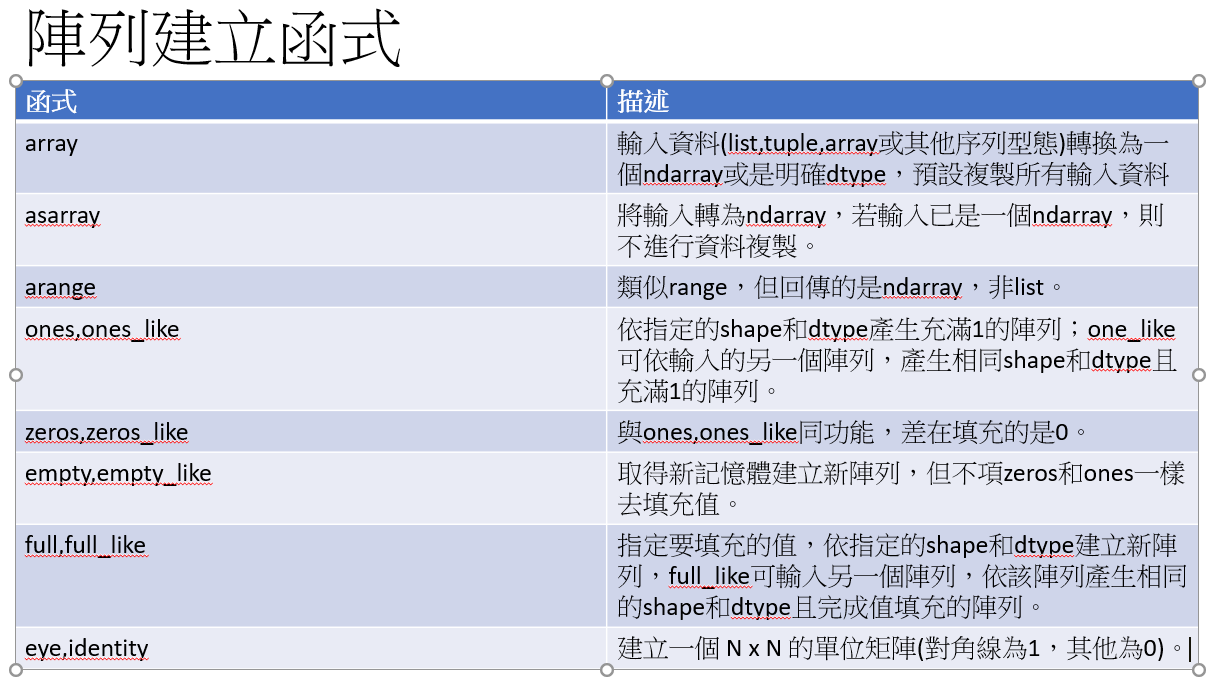

## ndarray資料型態

### 陣列的資料型態也就是dtype，含有ndarray所需資訊(metadata:資料的資料)，陣列需要用這些資訊，才能將一大塊記憶體解析成特定型態的資料。

### dtype是NumPy富有彈性的原因，dtype使得NumPy可與來自其他系統的資料進行互動。大多數情況下，dtype提供了對底層磁碟或記憶體的映射對應；有此映射後，讀取或寫出資料的數據串流到磁碟，或與低階的C或FORTRAN語言連結，就變得容易多了。

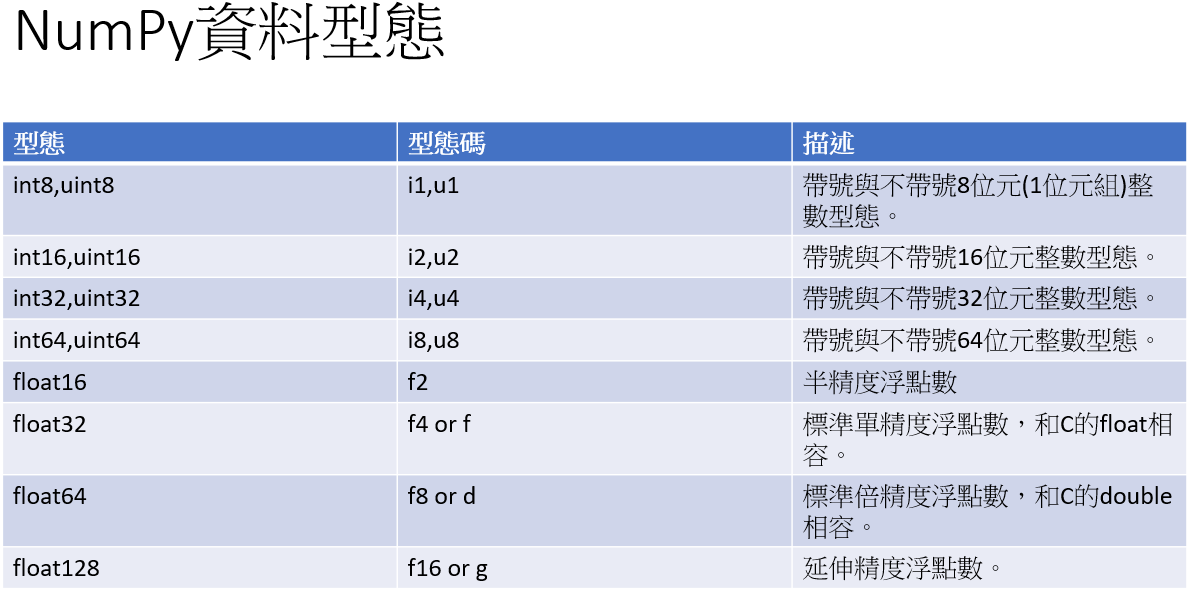

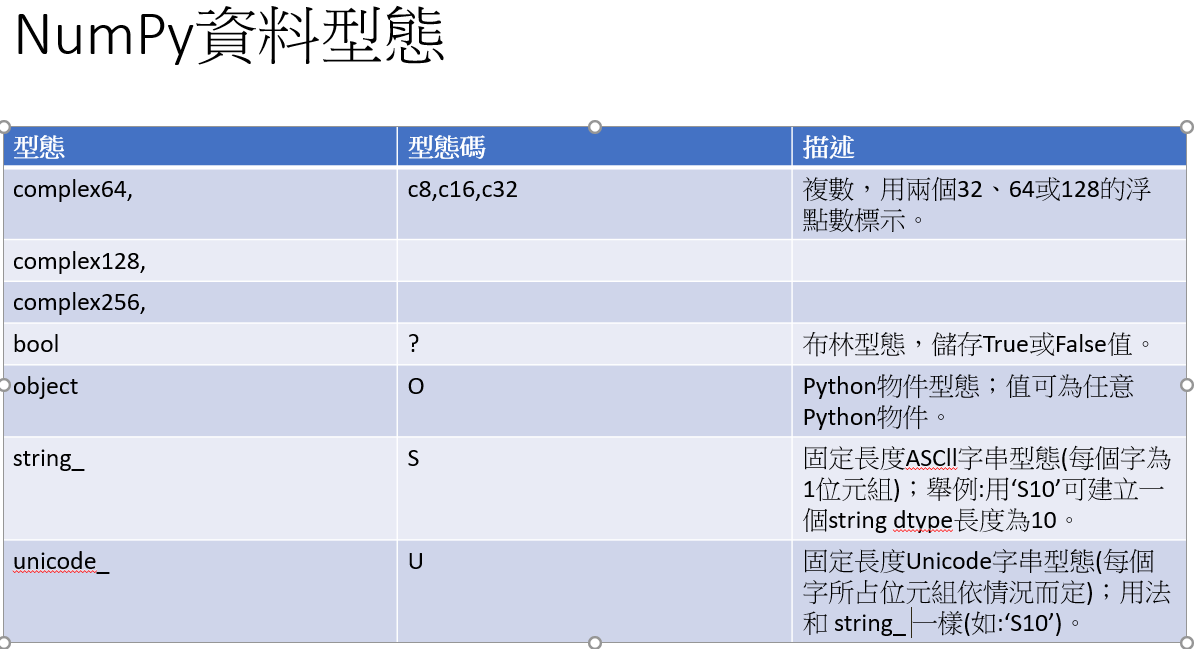

## 使用ndarray的astype方法，可將一個陣列從一種dtype轉換(cast)成另外一種dtype:

In [16]:
import numpy as np
arr=np.array([1,2,3,4,5])

In [17]:
arr.dtype

dtype('int32')

In [18]:
# 將整數轉成浮點數
float_arr=arr.astype(np.float64)

In [20]:
float_arr.dtype

dtype('float64')

#### 若是將浮點數整為整數，小數點會被遺棄:

In [21]:
arr=np.array([3.7,-1.2,-2.6])

In [22]:
arr.dtype

dtype('float64')

In [23]:
int_arr=arr.astype(np.int32)

In [24]:
int_arr.dtype

dtype('int32')

In [25]:
int_arr

array([ 3, -1, -2])

#### 如果是用字串表示數字的陣列，可轉成數值:

In [26]:
arr=np.array(['120','-12'],dtype=np.string_)

In [30]:
new_arr=arr.astype(float # 字串不能轉乘 float64 故用 float，NumPy 會將 Python型態轉成它自己對應的型態。

In [32]:
new_arr.dtype

dtype('float64')

#### 在使用numpy.string_型態時要小心，此字串長度為固定的，可能會將輸入值截斷，也不會發出任何錯誤警告。

### 也可以使用另外一個陣列的dtype屬性來做轉換:

In [34]:
int_arr=np.arange(10)

In [35]:
calibers=np.array([.22,.270],dtype=np.float64)

In [37]:
int_arr.astype(calibers.dtype) # 轉成與 calibers 相同的 dtype

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### 可也用簡短的型態碼來代表dtype:

In [38]:
empty_uint32=np.empty(8,dtype='u4') # 32 位元不帶號型態

In [39]:
empty_uint32

array([1828382344,        367,    4849710,    3866707,    4849710,
          4522067,    3014715,    5439575], dtype=uint32)

#### 使用astype一定會建立一個新陣列(資料會複製過去)，即使新的dtype和原來舊的dtype一致也一樣。

## NumPy陣列的算術運算

### 陣列讓你可對資料進行整批運算，而不用寫任何的 for 迴圈，此特性稱為 向量化 (vectorization)。

### 對相等大小陣列進行任何算數運算，會對每個元素進行動作:

In [40]:
arr=np.array([[1,2,3],[4,5,6]])

In [41]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [43]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

### 若是和一個常數做算術運算的話，就會對陣列中每個元素做該常數算術運算:

In [44]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [46]:
arr ** 0.5 #開根

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

### 若是對兩陣列做比較的話，會產生一個布林陣列:

In [47]:
arr2=np.array([[0,4,1],[7,2,12]])

In [48]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## 基本的索引和切片

### 對於一維陣列，與Python List差不多:

In [62]:
arr=np.arange(10)

In [63]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
arr[5] # 第六個，因為第一個是0

5

In [65]:
arr[5:8]

array([5, 6, 7])

In [66]:
arr[5:8]=12 #將 6、7和8個元素換成12

In [67]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

### 和Python list的區別在於，陣列切片是在原來的陣列上做一個view而已，意思說資料是同一份，且在view中修改的話，會同時修改到原本的陣列內容:

In [68]:
arr_slice=arr[5:8]

In [69]:
arr_slice

array([12, 12, 12])

#### 修改arr_slice裡的值，也會影響到原陣列arr:

In [70]:
arr_slice[1]=12345

In [71]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [72]:
arr_slice[:]=64 #[:]鰾是要使用陣列中所有值。

In [73]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

#### 若想做切片時，想把資料複製出去，而不只使用view的話，可以指定要做複製，舉例來說:arr[5:8].copy()

### 碰到更高維度的陣列時，能做的動作更多。在一個二維陣列中，每個索引指到的不再是常數，而是一個一維陣列:

In [2]:
import numpy as np

In [4]:
#二維陣列
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [5]:
arr2d[2]

array([7, 8, 9])

### 可用一個逗號分隔的索引，指定要取得的元素，下列兩寫法是相等的:

In [6]:
arr2d[0][2]

3

In [7]:
arr2d[0,2]

3

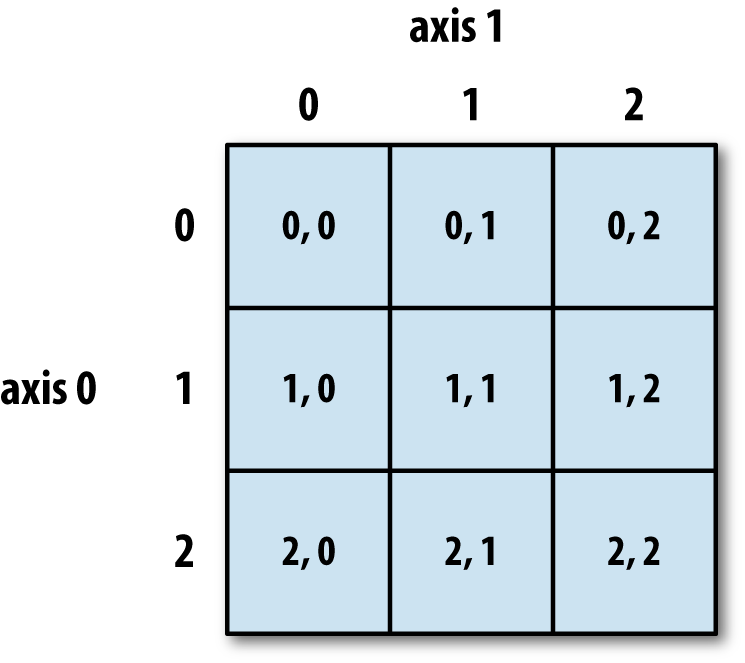

#### axis0 -> row
#### asix1 -> column

### 在多維陣列中，若省略後面的索引，回傳的物件將會是個較低維度的陣列，其內容對應原來高維度陣列中的資料:

In [10]:
#一個 2X2X3的陣列 arr3d
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [11]:
# arr3d[0] 維一個 2X3 陣列
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

#### 可將常數或陣列指定給arr3d[0]:

In [12]:
old_values=arr3d[0].copy()

In [13]:
arr3d[0]=42 #常數

In [14]:
arr3d # arr3d[0] 元素接變為42

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [15]:
arr3d[0]=old_values #將陣列指定給 arr3d[0]

In [16]:
arr3d #變回原樣

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

### 在高維度陣列中，同樣可用逗號分隔的方法:

In [18]:
arr3d[1,0]  #索引區間(1,0)的值

array([7, 8, 9])

#### 下列式子為等效的，只是拆成兩部做索引:

In [19]:
x=arr3d[1]

In [20]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [21]:
x[0]

array([7, 8, 9])

#### 在選定陣列中的子集後，回傳的陣列都是 view

## 使用陣列做索引

### 跟 Python list 的一維物件一樣， ndarray 也可用老方法做切片:

In [23]:
arr=np.array([0,1,2,3,4,64,64,64,8,9])

In [24]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [25]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

### 二維陣列切片方法稍有不同:

In [26]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [27]:
arr2d[:2]  # 選取 arr2d 開頭的兩個列。

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
arr2d[:2,1:] # 做多個索引

array([[2, 3],
       [5, 6]])

### 切片時所得到的回傳陣列 view，和原來的陣列必為相同維度。但若混合整數索引和切片，會得到較低維度的切片:

In [30]:
arr2d[1, :2] #第二列中開頭的兩行

array([4, 5])

In [31]:
arr2d[:2,2] #第三行，但限於開頭兩列

array([3, 6])

#### 若裡面只寫一個冒號表示整軸都要取，此方法可用來取較高維度的陣列:

In [32]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

In [33]:
#若對切片範圍指定值的話，就是給值
arr2d[:,:1]=0

In [34]:
arr2d

array([[0, 2, 3],
       [0, 5, 6],
       [0, 8, 9]])

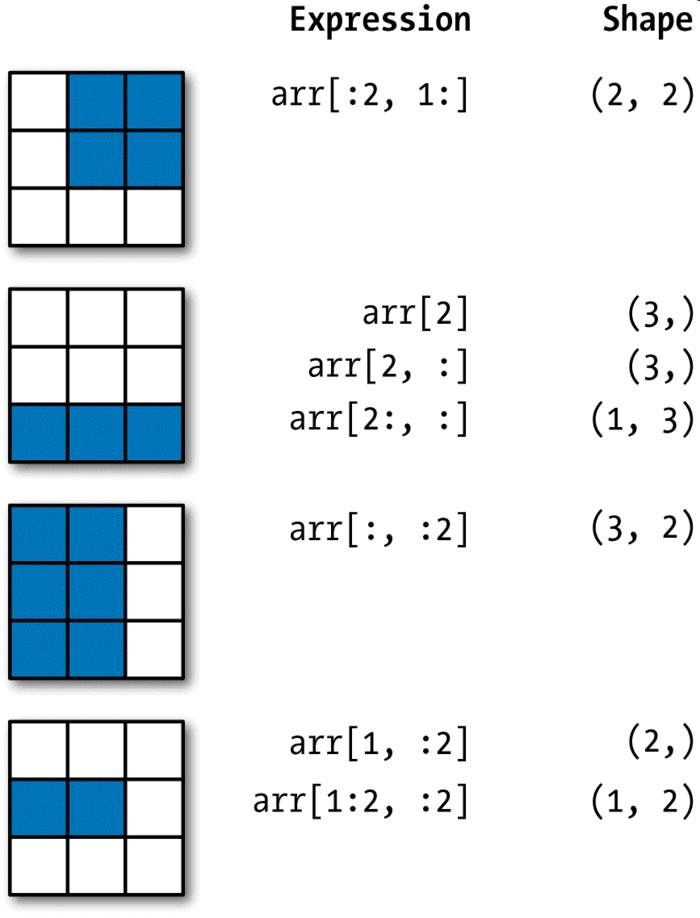

## 布林索引

In [39]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe']) # 具重複名字的陣列

In [40]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [41]:
data=np.random.randn(7,4) #一些隨機常態資料。

In [42]:
data

array([[-1.92002861, -1.46394105,  1.76800287, -0.54539604],
       [-0.64904549,  0.65089008, -0.58295014,  0.3575142 ],
       [-0.74606528, -0.01535013, -2.47882695, -0.59554098],
       [-0.32292162, -0.46268204,  0.25307722, -1.31141641],
       [-0.01658194,  0.33018759,  0.37574501, -1.71521323],
       [ 1.14149098,  0.98296475, -0.24724665,  0.62163549],
       [ 0.66481146,  0.4927601 , -0.28650129,  0.89958012]])

### 假設每個名字是一個 row 的開頭，想把名稱是 Bob 的 row 選取出來，可向算術運算一樣，進行比較(例如 : ==)也是向量化的動作，所以 names 和字串 Bob 進行比較，會產生一個布林陣列:

In [44]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

In [46]:
#將布林陣列用在陣列索引:
#此處是當 row 
data[names=='Bob']

array([[-1.92002861, -1.46394105,  1.76800287, -0.54539604],
       [-0.32292162, -0.46268204,  0.25307722, -1.31141641]])

#### 布林陣列和它要進行索引的軸，長度必須一致。也可將布林陣列及切片或整數混用。

#### 布林陣列的長度如果不匹配時，布林選取也不會失敗，需謹慎使用!!!

In [47]:
#用布林索引及column索引
data[names=='Bob',2:]

array([[ 1.76800287, -0.54539604],
       [ 0.25307722, -1.31141641]])

In [48]:
data[names=='Bob',3]

array([-0.54539604, -1.31141641])

#### 若要選擇不為'Bob'的 row，可使用 != 或 反向 ~ :

In [49]:
names!='Bob'

array([False,  True,  True, False,  True,  True,  True])

In [50]:
data[~(names=='Bob')]

array([[-0.64904549,  0.65089008, -0.58295014,  0.3575142 ],
       [-0.74606528, -0.01535013, -2.47882695, -0.59554098],
       [-0.01658194,  0.33018759,  0.37574501, -1.71521323],
       [ 1.14149098,  0.98296475, -0.24724665,  0.62163549],
       [ 0.66481146,  0.4927601 , -0.28650129,  0.89958012]])

#### ~運算子在做反向條件的時候非常好用:

In [51]:
cond=names=='Bob'

In [52]:
data[~cond]

array([[-0.64904549,  0.65089008, -0.58295014,  0.3575142 ],
       [-0.74606528, -0.01535013, -2.47882695, -0.59554098],
       [-0.01658194,  0.33018759,  0.37574501, -1.71521323],
       [ 1.14149098,  0.98296475, -0.24724665,  0.62163549],
       [ 0.66481146,  0.4927601 , -0.28650129,  0.89958012]])

### 想從三個名字裡選擇兩個的時候，就使用布林算術運算子合併布林條件，像是 &(且) 和 |(或) :

In [53]:
mask = (names=='Bob')|(names=="Will")

In [54]:
mask

array([ True, False,  True,  True,  True, False, False])

In [55]:
data[mask]

array([[-1.92002861, -1.46394105,  1.76800287, -0.54539604],
       [-0.74606528, -0.01535013, -2.47882695, -0.59554098],
       [-0.32292162, -0.46268204,  0.25307722, -1.31141641],
       [-0.01658194,  0.33018759,  0.37574501, -1.71521323]])

#### 從一個陣列中以布林索引選取資料，必定會建立一份新的資料複製，即使回傳一模一樣的陣列也一樣。

#### Python關鍵字 and 和 or，不能和布林陣列一起用，得用 & 和 |。

### 要利用布林陣列來設定值:

In [56]:
# 將data中的負值設為0
data[data<0]=0

In [57]:
data

array([[0.        , 0.        , 1.76800287, 0.        ],
       [0.        , 0.65089008, 0.        , 0.3575142 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.25307722, 0.        ],
       [0.        , 0.33018759, 0.37574501, 0.        ],
       [1.14149098, 0.98296475, 0.        , 0.62163549],
       [0.66481146, 0.4927601 , 0.        , 0.89958012]])

### 利用一維布林陣列，設定整行或整列的值:

In [58]:
data[names!='Joe']=7

In [59]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.65089008, 0.        , 0.3575142 ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [1.14149098, 0.98296475, 0.        , 0.62163549],
       [0.66481146, 0.4927601 , 0.        , 0.89958012]])

## 花式索引

### 花式索引是描述 NumPy 中用整數陣列做索引的專有名詞。

In [1]:
import numpy as np

In [4]:
# 8X4 的陣列:
arr=np.empty((8,4))

In [6]:
for i in range(8):
    arr[i]=i

In [7]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

### 若想以特定順序選取 row 的話，只要傳入一個用來指定順序的整數 list 或  ndarray 即可: 

In [8]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

### 使用負數可從尾端開始選 row :

In [9]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

### 若是傳入多個索引陣列的話，效果又不同，會將指定的 index 結成 tuple 後，把對應位置的值抓成一維陣列回傳:

In [10]:
arr=np.arange(32).reshape((8,4)) # reshape() 將其轉為 8X4

In [11]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [12]:
arr[[1,5,7,2,],[0,3,1,2]]  # (1,0),(5,3),(7,1),(2,2)

array([ 4, 23, 29, 10])

#### 不論多少維度陣列，使用花式索引所回傳的陣列永遠只有一維。

### 組成次序是由選定的矩陣 row 或 column 指定:

In [15]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

#### 花式索引和切片不同，花式索引也會將資料複製到新陣列中

## 轉置陣列和軸交換

#### 轉置是其中一種重新塑形 (reshapeing)，而重新塑形只會改變 view，不會把底層的資料真的重新安排。

### 陣列中有一個 transpose 方法，以及一個特別的 T 屬性 ，皆可進行轉置:

In [17]:
arr=np.arange(15).reshape((3,5))

In [18]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [19]:
arr.T #轉置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

### 矩陣計算時，常會做些動作，如 np.dot 計算矩陣內積:

In [20]:
arr=np.random.randn(6,3)

In [21]:
arr

array([[-1.28553189,  1.3051462 ,  1.37233947],
       [-0.37517751,  0.12427988, -0.19788395],
       [-0.20755275,  0.53849705,  0.67043424],
       [ 2.12618819,  0.2445974 , -0.24283092],
       [ 0.41297404,  0.15249689, -1.37148259],
       [ 1.10256736, -0.36976613, -0.05143374]])

In [22]:
np.dot(arr.T,arr)

array([[ 7.74330712, -1.66085533, -2.96849511],
       [-1.66085533,  2.22864135,  1.87801333],
       [-2.96849511,  1.87801333,  4.31453254]])

### 面對更高維度的陣列，transpose() 可接受軸編號 tuple 來排列軸:

In [23]:
arr=np.arange(16).reshape((2,2,4))

In [24]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [25]:
arr.transpose((1,0,2)) #第二軸優先，第一軸次之，第三軸不變。

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### swapaxes() 可自行指定要互換的軸編號，然後重新將資料排過:

In [26]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [27]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

#### swapaxes 不進行資料複製，只回傳 view。

## 全域函式:快速元素級別陣列函式

#### 全域函式是一種對 ndarray 裡的資料，執行元素級別運算的函式，也稱 ufunc。一般函式可接受一或多個向量並輸出一到多個常量，你可把全域函式想像成是包裝了一般函式，把一般函式變成具有快速向量能力的函式。

### 許多的全域函式都只做元素級別的轉換，例如: sqrt 或 exp :

In [29]:
arr=np.arange(10)

In [30]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [32]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

#### 以上為一元(unary)的全域函式。 

### 接受兩個函式作為參數的全域函式，例如: add 或 maximum，執行結果是單一的陣列:

In [33]:
x=np.random.randn(8)

In [34]:
y=np.random.randn(8)

In [35]:
x

array([-0.33878858, -0.46411345,  0.55533887,  1.08392329, -1.88877887,
        0.49941034,  1.16624135,  0.00853617])

In [36]:
y

array([ 0.78683523, -0.77568106, -0.72603498,  0.34133038,  0.3147824 ,
       -1.47413338, -0.172766  , -0.75779472])

In [37]:
np.maximum(x,y) #在x和y中，逐元素找出較大的數。

array([ 0.78683523, -0.46411345,  0.55533887,  1.08392329,  0.3147824 ,
        0.49941034,  1.16624135,  0.00853617])

#### 以上稱為二元(binary)全域函式

### 少數全域函數會回傳多個陣列，modf就是一個例子，是Python內建divmod的向量版本，能將一個浮點數陣列中的分數和整數部分分開回傳:

In [38]:
arr=np.random.randn(7)*5

In [39]:
arr

array([ 2.22651095,  5.65081799,  0.17142685,  1.76203863,  8.64314826,
       -8.55711983, -1.14558334])

In [40]:
reminder,whole_part=np.modf(arr)

In [41]:
reminder

array([ 0.22651095,  0.65081799,  0.17142685,  0.76203863,  0.64314826,
       -0.55711983, -0.14558334])

In [42]:
whole_part

array([ 2.,  5.,  0.,  1.,  8., -8., -1.])

### 可以選擇對全域函式使用out參數，就可做到將運算以 in-place形式在原陣列中完成:

In [43]:
arr

array([ 2.22651095,  5.65081799,  0.17142685,  1.76203863,  8.64314826,
       -8.55711983, -1.14558334])

In [44]:
np.sqrt(arr)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.49214977, 2.37714492, 0.41403726, 1.32741803, 2.93992317,
              nan,        nan])

In [45]:
np.sqrt(arr,arr) # 加入out參數。

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.49214977, 2.37714492, 0.41403726, 1.32741803, 2.93992317,
              nan,        nan])

In [46]:
arr

array([1.49214977, 2.37714492, 0.41403726, 1.32741803, 2.93992317,
              nan,        nan])

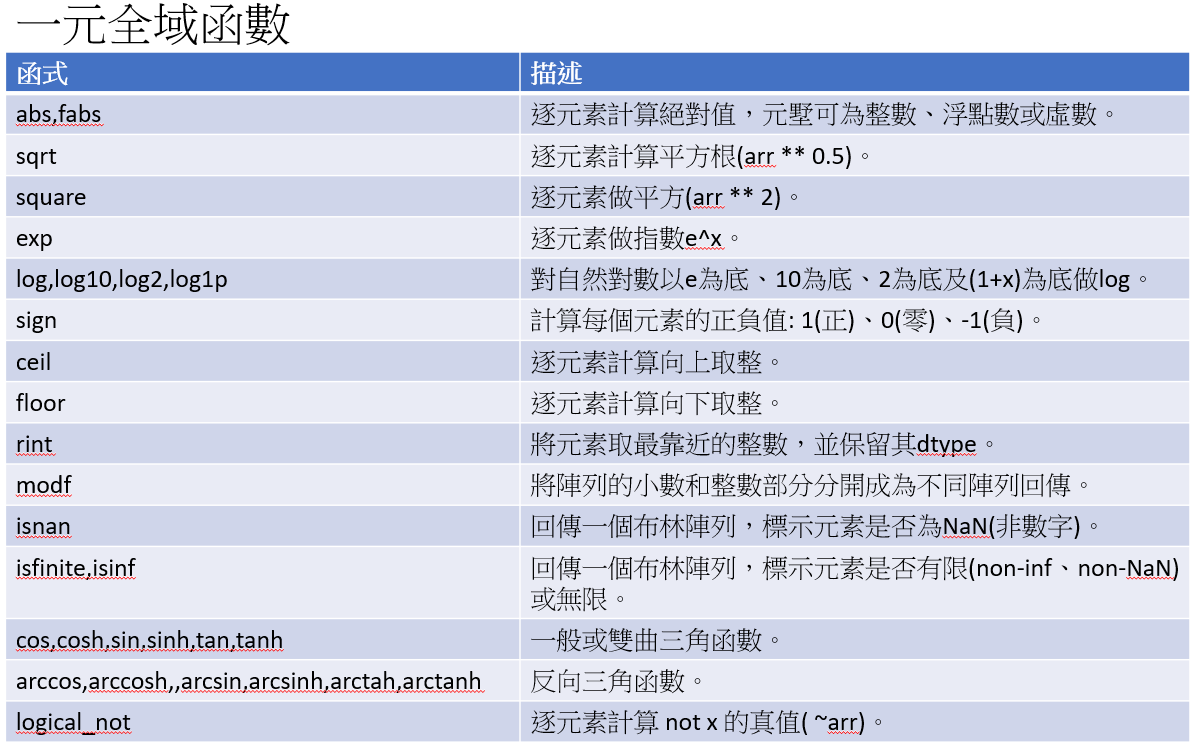

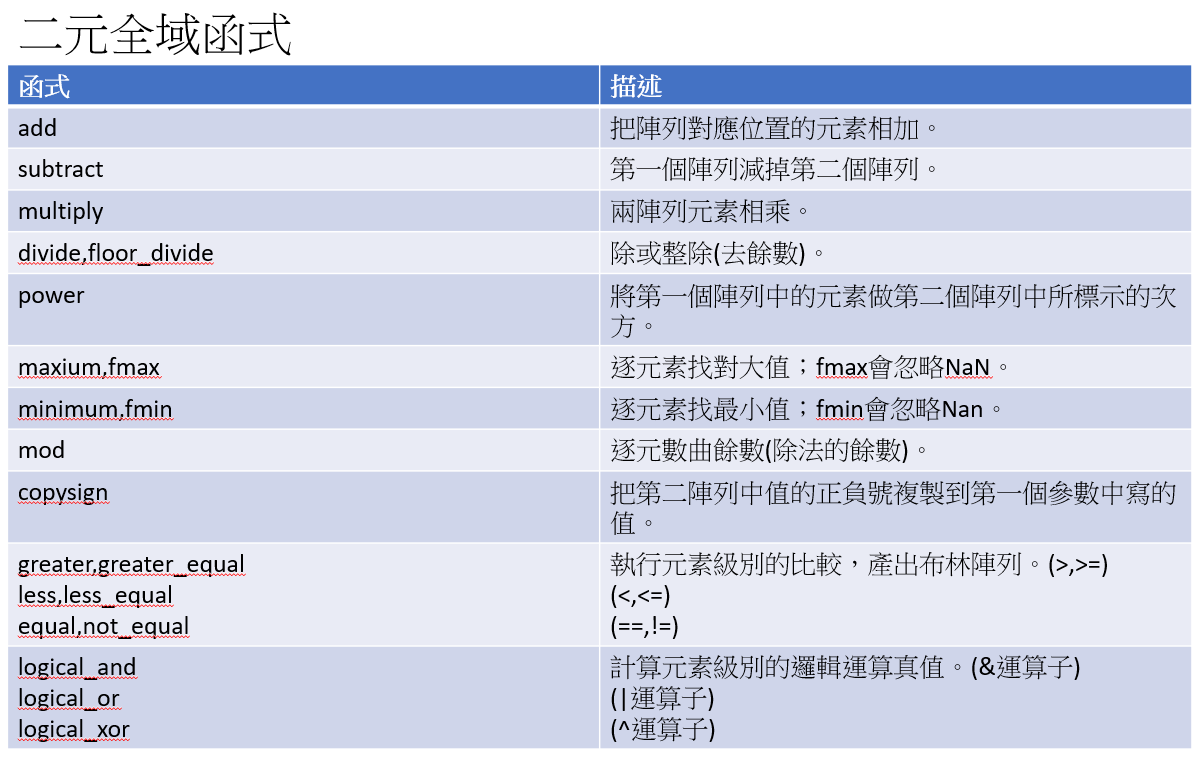

## 用陣列寫陣列導向程式

#### 使用NumPy陣列，可讓原本需要使用迴圈的資料處理工作，精簡成陣列表達式，此動作稱為 向量化。一般來說同一個工作，用向量化陣列計算會比其他純Python實作快上一到兩個級別(時間複雜度級別)，其中影響最大的是多種類型的數值運算。

### 範例:
#### 對一堆井井有序的資料計算函式sqrt(x^2+y^2)的值

In [9]:
import numpy as np

In [10]:
points=np.arange(-5,5,0.01) #1000個等距點

In [11]:
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

#### meshgrid()接受一維陣列參數，並產出兩個二維矩陣，能將原來兩陣列中所有元素，配成一對對的(x,y)。

In [12]:
xs,ys=np.meshgrid(points,points)

In [13]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [14]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

#### 操作兩個點計算函式值:

In [15]:
z=np.sqrt(xs**2+ys**2)

In [16]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

#### 透過 matplotlib 函式庫將其圖形繪出:

In [17]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of value')

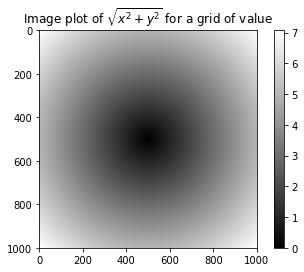

In [21]:
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title('Image plot of $\sqrt{x^2+y^2}$ for a grid of value')

## 用陣列運算表達條件邏輯

In [22]:
xarr=np.array([1.1,1.2,1.3,1.4,1.5])

In [23]:
yarr=np.array([2.1,2.2,2.3,2.4,2.5])

In [24]:
cond=np.array([True,False,True,True,False])

#### 假設要在cond中看到True時，從xarr拿值，不然就重yarr拿值。使用 list comprehension :

In [26]:
result=[(x if c else y) for x,y,c in zip(xarr,yarr,cond)]

In [27]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

####  碰到大陣列時，此方法會變得很慢，且碰到多維陣列時就不能用。

### np.where 為函式 x if c else y 這個三元表達式的向量版本:

In [29]:
result=np.where (cond,xarr,yarr)

In [30]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

### np.where 的第二和第三參數並不限定一定要是陣列，也可是任意的放一或兩個常數:

In [31]:
arr=np.random.randn(4,4)

In [32]:
arr

array([[-1.63047447, -0.58814516,  0.60994712,  1.45692105],
       [-2.09435902, -1.65487619,  1.09868162,  0.47697189],
       [ 0.2564924 , -0.13108413, -0.27502922,  0.35812934],
       [-1.74738617, -2.52444412,  0.6950854 , -0.52914122]])

In [33]:
arr>0

array([[False, False,  True,  True],
       [False, False,  True,  True],
       [ True, False, False,  True],
       [False, False,  True, False]])

In [36]:
np.where(arr>0,2,-2)

array([[-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [ 2, -2, -2,  2],
       [-2, -2,  2, -2]])

#### 可混合使用常數和陣列:

In [38]:
np.where(arr>0,2,arr) #只將正數換為2

array([[-1.63047447, -0.58814516,  2.        ,  2.        ],
       [-2.09435902, -1.65487619,  2.        ,  2.        ],
       [ 2.        , -0.13108413, -0.27502922,  2.        ],
       [-1.74738617, -2.52444412,  2.        , -0.52914122]])

#### 傳給 np.where 的陣列和常數數量，不一定要大小相等。

## 數學和統計方法

#### 陣列類別有一些數學方法，用來計算整個陣列或沿軸計算統計資料。可藉由呼叫陣列實例方法，或最上層的NumPy函式，執行像sum、mean及std(均方差)等 聚合函數(aggregation，又稱reduction)。

In [40]:
arr=np.random.randn(5,4)

In [41]:
arr

array([[-0.52462019,  0.59657334, -0.4293862 ,  0.14926423],
       [ 0.8827214 , -1.22186944, -0.57168763, -2.39513106],
       [ 1.14574415,  0.76521095, -0.52246062,  0.32658017],
       [-0.97396992,  0.23358554,  0.11668325, -0.68720479],
       [-0.00393684, -0.46079156, -1.52696358, -1.89559687]])

In [42]:
arr.mean() #取平均

-0.3498627835805699

In [43]:
np.mean(arr)

-0.3498627835805699

In [44]:
arr.sum() #總和

-6.997255671611398

### 像mean和sum這樣的函式能接受一個axis參數，用來沿著指定 軸 計算統計資料，回傳一個比原本陣列維度低的陣列:

In [46]:
arr.mean(axis=1) #計算每 row 的平均

array([-0.05204221, -0.82649168,  0.42876866, -0.32772648, -0.97182221])

In [47]:
arr.sum(axis=0) #計算每個 column　總和

array([ 0.5259386 , -0.08729117, -2.93381479, -4.50208831])

### 像是cumsum和cumprod不會做聚合，會回傳陣列結果：

In [51]:
arr=np.array([0,1,2,3,4,5,6,7])

In [52]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

### 碰到多維陣列時，像cumsum這種會累加的函式會回傳和原陣列一樣大的陣列，只是內部動作式沿著指定的軸，進行更低維度的切片後，進行小區域的聚合計算:

In [1]:
import numpy as np

In [2]:
arr=np.array([[0,1,2],[3,4,5],[7,8,9]])

In [3]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [10, 13, 16]], dtype=int32)

In [5]:
arr.cumprod(axis=1) 

array([[  0,   0,   0],
       [  3,  12,  60],
       [  7,  56, 504]], dtype=int32)

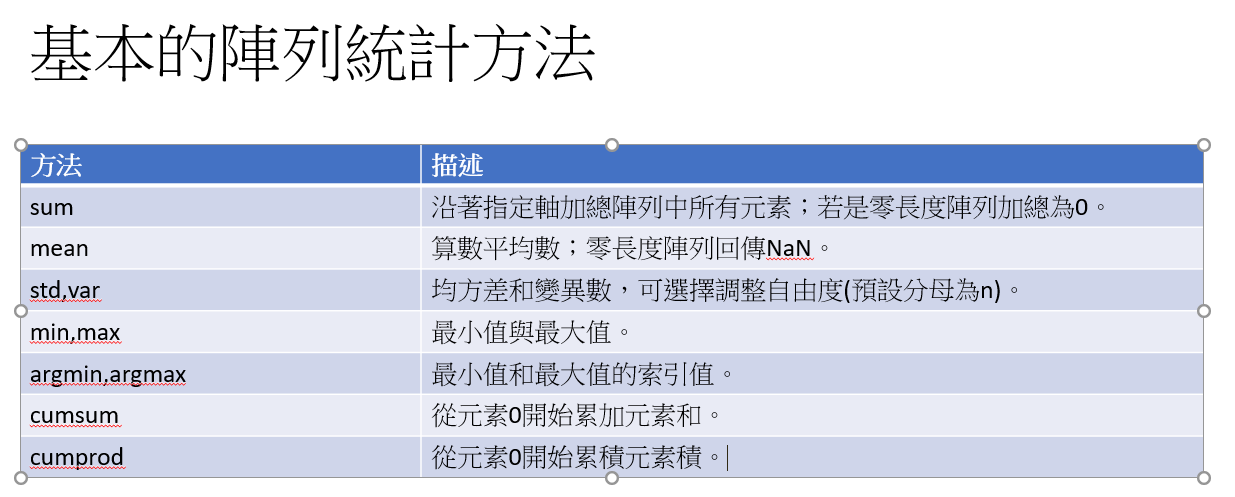

## 布林陣列的方法

### 因為布林值不是1(True)就是0(False)，sum 可用來計算一個布林陣列中 True 值有多少個:

In [6]:
arr=np.random.randn(100)

In [7]:
(arr>0).sum() #取正數有幾個

52

### 還有any和all這兩方法對布林陣列特別好用:

In [8]:
bools=np.array([False,False,True,False])

In [9]:
# any 用來檢查陣列中是否有多一個值為True
bools.any()

True

In [10]:
# all 用來檢查陣列中是否全部的值皆為True
bools.all()

False

#### 以上方法都可用在非布林陣列上，非零值皆被認定為True

## 排序

### NumPy可用sort方法進行 in-place式的排序:

In [11]:
arr=np.random.randn(6)

In [12]:
arr

array([-1.01421444, -0.35194086,  1.26578351,  1.00398571, -0.25658901,
       -0.38608395])

In [13]:
arr.sort() #小到大

In [14]:
arr

array([-1.01421444, -0.38608395, -0.35194086, -0.25658901,  1.00398571,
        1.26578351])

### 將軸的資訊傳入sort，可獨立排序一個多維陣列裡的所有一維陣列:

In [15]:
arr=np.random.randn(5,3)

In [16]:
arr

array([[ 0.61760666,  0.13250051,  0.17769858],
       [ 0.74830584,  0.66908262, -1.81533078],
       [-0.95224968, -1.03737416, -0.17605171],
       [-0.28430182,  0.45918247,  0.17163095],
       [-0.54864677,  0.10286924,  0.93895047]])

In [17]:
arr.sort(1)

In [18]:
arr

array([[ 0.13250051,  0.17769858,  0.61760666],
       [-1.81533078,  0.66908262,  0.74830584],
       [-1.03737416, -0.95224968, -0.17605171],
       [-0.28430182,  0.17163095,  0.45918247],
       [-0.54864677,  0.10286924,  0.93895047]])

#### np.sort這個最頂層方法會回傳一個排好序的複製陣列，不是in-place修改原來的陣列。

## Unique和其他集合操作

### np.unique為一種對一維ndarray的基本集合操作，可回傳陣列中排好序的不重複值:

In [22]:
names=np.array(['Bob','Joe','Will','Bob','Joe','Will'])

In [23]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [24]:
ints=np.array([3,3,3,2,2,1,1])

In [25]:
np.unique(ints)

array([1, 2, 3])

### np.in1d 函式用來檢查陣列中的值是否存在另外一個陣列中:

In [26]:
values=np.array([6,0,0,3,2,5,6])

In [27]:
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

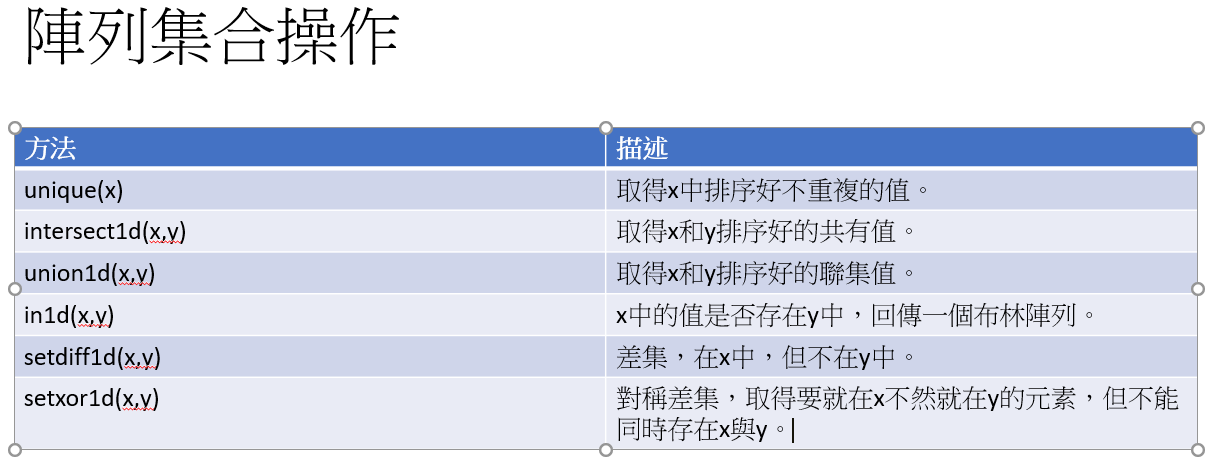

## 從檔案輸入或輸出值到陣列

#### NumPy能儲存或載入磁碟上的文字或二進位資料。

### np.save 和 np.load是有效率地從磁碟載入陣列資料的基礎函式，陣列預設是以未壓縮的原始二進位格式，儲存在副檔名為 .npy 的檔案中。

In [28]:
arr=np.arange(10)

In [29]:
np.save('some_array',arr) #若未指定副檔名 .npy 的話，會自動加入。

In [30]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 若要以未壓縮儲存多個陣列，就使用 np.savez，並將陣列化為帶 keyboard 參數傳入:

In [31]:
np.savez('array_archive.npz',a=arr,b=arr) #儲存多個陣列時檔名變 .npz

### 載入 .npz 檔時，會得到一個像字典型態的物件(dict-like object)，能 lazily 載入每個獨立的陣列。
#### lazily 指的是通常要用才動作的意思。

In [32]:
arch=np.load('array_archive.npz')

In [33]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 若資料為壓縮過的，改用 numpy.savez_compressed:

In [35]:
np.savez_compressed('array_compressed.npz',a=arr,b=arr)

## 線性代數

#### NumPy和MATLAB等一些語言不同，使用 * 不是做兩個二維矩陣的內積，而是元素級別的相乘。
### dot函式 可做矩陣內積，是陣列方法同時也存在於numpy名稱空間中:

In [36]:
x=np.array([[1,2,3,],[4,5,6]])

In [37]:
y=np.array([[6,23],[-1,7],[8,9]])

In [38]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [40]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [41]:
np.dot(x,y) #等於x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

### 一個二維陣列和大小相當的一維陣列的矩陣相乘結果，會回傳一個一維陣列:

In [42]:
np.ones(3)

array([1., 1., 1.])

In [43]:
np.dot(x,np.ones(3))

array([ 6., 15.])

#### 符號 @ 也可寫在中間，當矩陣乘法的運算子:

In [44]:
x @ np.ones(3)

array([ 6., 15.])

### numpy.linalg 函式庫中包含矩陣分解和類似反矩陣跟行列式的東西，作用和上述函式庫是一樣的:

In [45]:
from numpy.linalg import inv,qr

In [46]:
x=np.random.randn(5,5)

In [47]:
mat = x.T.dot(x) #計算x和它的轉置矩陣 x.T的內積

In [48]:
inv(mat) #計算方形矩陣的反矩陣

array([[ 16128.07034216, -32748.81446674,  20652.67944966,
         14375.18376493,  37386.70623532],
       [-32748.81446674,  66500.36308185, -41937.95500609,
        -29189.94023254, -75917.45800934],
       [ 20652.67944966, -41937.95500609,  26448.433412  ,
         18407.90456359,  47876.82218866],
       [ 14375.18376493, -29189.94023254,  18407.90456359,
         12813.8730183 ,  33323.75290575],
       [ 37386.70623532, -75917.45800934,  47876.82218866,
         33323.75290575,  86668.75933528]])

In [49]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -8.21261301e-13, -1.80357228e-13,
        -1.78570115e-12, -2.01415376e-11],
       [-2.01638343e-11,  1.00000000e+00, -3.45407965e-11,
        -8.91575855e-13, -8.70078946e-12],
       [-1.54313532e-12,  2.42210255e-11,  1.00000000e+00,
        -1.79066440e-11,  4.86733081e-12],
       [ 4.26003856e-13,  9.91692631e-12, -4.46330412e-12,
         1.00000000e+00, -8.30357552e-13],
       [ 8.40211870e-12,  8.30766603e-12, -1.55063267e-11,
        -6.10726678e-13,  1.00000000e+00]])

In [50]:
q,r=qr(mat) #計算QR分解

In [52]:
q

array([[-0.87612835, -0.07561629,  0.37091055, -0.10852078,  0.27808252],
       [ 0.00486126, -0.78129004,  0.26157401, -0.04779151, -0.56467446],
       [-0.16211162, -0.49169465, -0.60827041,  0.48492304,  0.35610806],
       [ 0.05488436, -0.24618623, -0.35908173, -0.86371561,  0.24786225],
       [ 0.45064732, -0.28547638,  0.54320514,  0.0691679 ,  0.6446427 ]])

In [51]:
r

array([[-3.24926921e+00,  3.53570072e-01, -1.41152196e+00,
        -3.12244849e-01,  2.61116489e+00],
       [ 0.00000000e+00, -3.88774987e+00, -3.24437498e+00,
        -1.81516218e+00, -9.15323975e-01],
       [ 0.00000000e+00,  0.00000000e+00, -2.57543964e+00,
        -1.83933692e+00,  2.12992570e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.57651525e-01,  3.29763999e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.43800541e-06]])

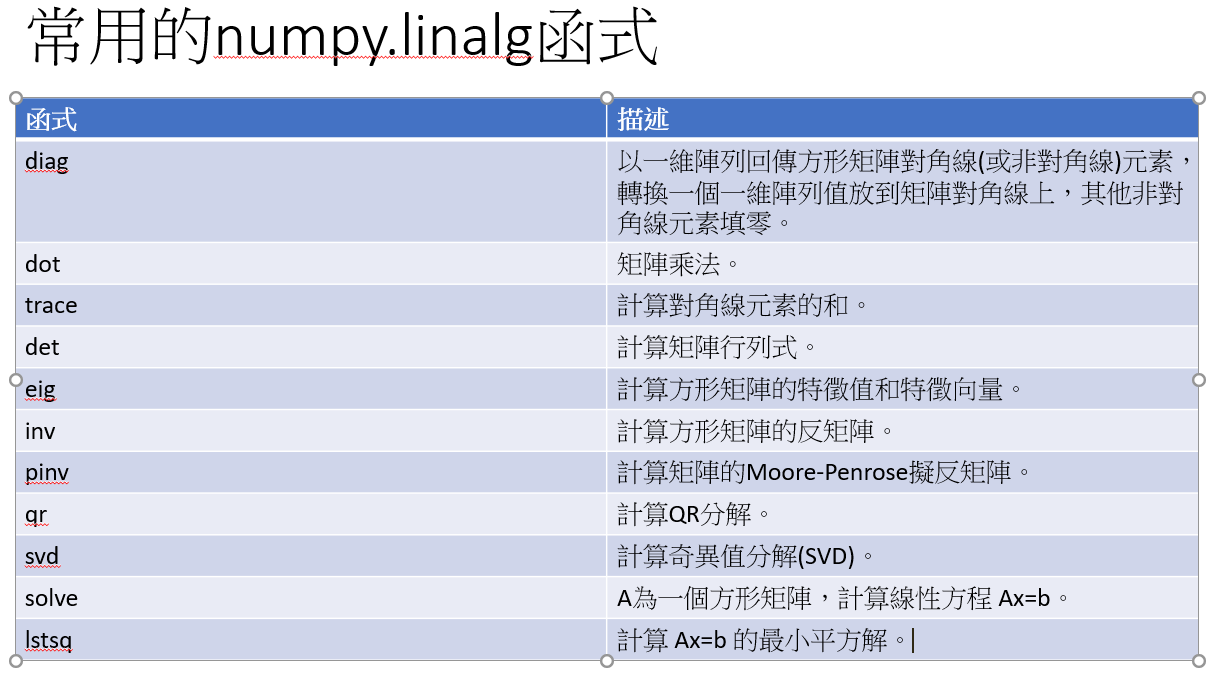

 ## 生成偽隨機函數

#### Python 內建的 random 模組，一次只能取得一個樣本值；numpy.random模組能有效率產生任意分布且大量的樣本值陣列。

### 使用 normal 得到裝載了常態分佈樣本的 4x4 陣列:

In [54]:
samples=np.random.normal(size=(4,4))

In [55]:
samples

array([[ 0.45219092, -0.5443872 ,  0.93473143,  0.19114719],
       [-1.18593209,  0.28402965,  0.09187383, -0.22713913],
       [ 1.06853491, -0.86162383, -1.32740485, -0.83029264],
       [ 0.191754  , -0.16733969,  0.32982819,  0.50178283]])

#### 會稱這些數值為 偽隨機數 的原因是，這些數字的產生是由亂數產生器的 種子 所決定，可用 np.random.seed 修改 NumPy 的亂數產生器種子:

In [ ]:
np.random.seed(1234)

#### 在 numpy.random 中的資料產生函式使用全域的隨機種子，為了避免全域種子，可使用 numpy.random.RandomState建立獨立的亂數產生器:

In [56]:
rng=np.random.RandomState(1234)

In [57]:
rng.rand(10)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263])

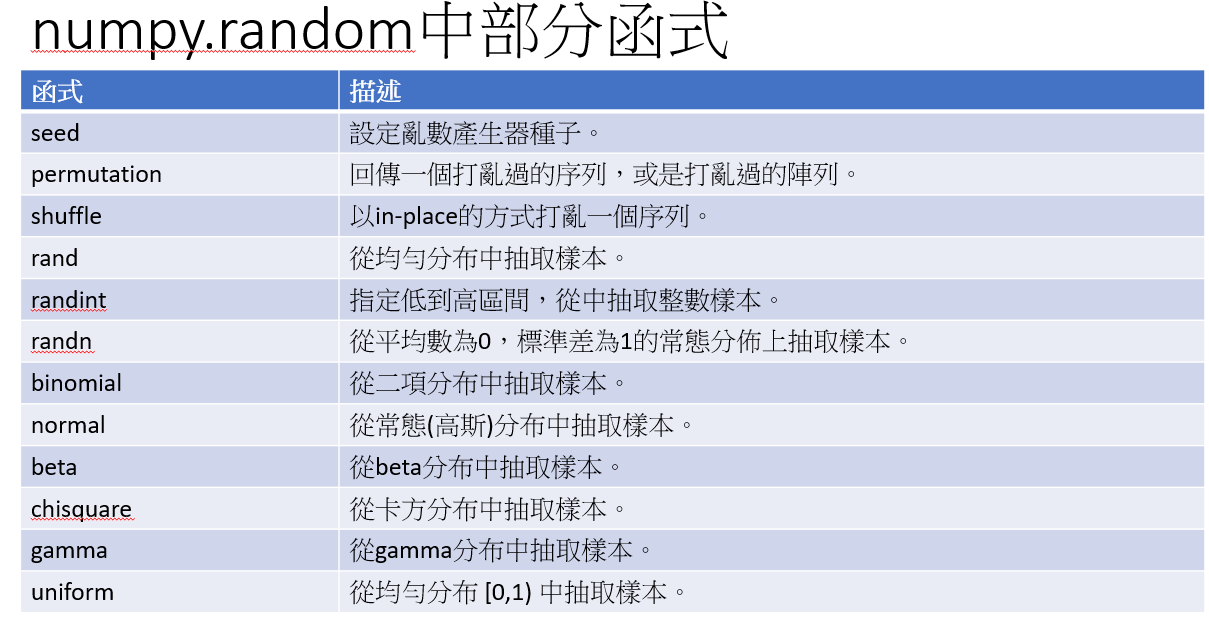